In [20]:
import os
import os.path
import cv2
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean 
from insightface.embedder import InsightfaceEmbedder
import numpy as np
from face_detection import RetinaFace
import math


In [10]:
detector = RetinaFace() 

In [11]:
model_path = "model-r100-ii/model"
embedder = InsightfaceEmbedder(model_path=model_path, epoch_num='0000', image_size=(112, 112))

loading model-r100-ii/model 0


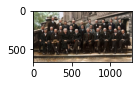

In [13]:
img1 = cv2.imread("./allprof.jpg")
fig = plt.figure()
a=fig.add_subplot(1, 3, 1)
plt.imshow(img1[:,:, ::-1])

Exception: No face detected!

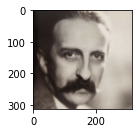

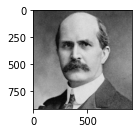

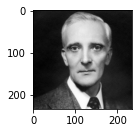

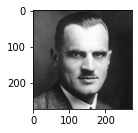

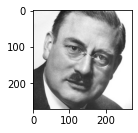

In [17]:
portraits = os.listdir(path="./portraits/")
portraits_embeddings = []
for i in range(len(portraits)):
    p='./portraits/'+portraits[i]
    img = cv2.imread(p)
    fig = plt.figure()
    fig=fig.add_subplot(1, 3, 1)
    plt.imshow(img[:,:, ::-1])
    face = detector(img)
    box, landmarks, score = face[0]
    x, y, w, h = box
    sub_face = img[int(y):int(h), int(x):int(w)]
    portraits_embeddings.append(embedder.embed_image(sub_face))

In [19]:
detector = RetinaFace()
faces = detector(img1)
prof_emb=[]
for i in range(len(faces)):
  # print(faces[i])
  box, landmarks, score = faces[i]

  x, y, w, h = box
  for box in faces:
    cv2.rectangle(img1, (int(x), int(y)), (int(w), int(h)), (255, 255, 0), 2)
  cv2.imwrite("face_detected.jpeg", img1)
  sub_face = img1[int(y):int(h), int(x):int(w)]
  prof_emb.append(embedder.embed_image(sub_face))

Exception: No face detected!

In [21]:
def cos_similar(a1,a2):
#     a1 to a2 = (a1 dot a2)/{||a1||*||a2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(a1)):
        x = a1[i]; y = a2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

In [ ]:
p1= io.imread("/content/gdrive/My Drive/project/allprof.jpg")
p1
allprof_embeddings = []
faces=detector(p1)
fontScale = 0.5
font = cv2.FONT_HERSHEY_SIMPLEX 
for i in range(len(faces)):

  box, landmarks, score = faces[i]
  x, y, w, h = box
  allprof_embeddings.append(box)
  k=allprof_embeddings[i]
  
  maxres=0
  maxres_ind_name=0
  for j in range(len(portraits_embeddings)):
    res=cos_similariy(k,portraits_embeddings[j])
    if res>maxres:
      maxres=res
      maxres_ind_name=j
    print(maxres)
  if maxres>0.5:
    for box in faces[i]:
      cv2.rectangle(p1, (int(x), int(y)), (int(w), int(h)), (255, 255, 0), 2)
      # cv2.imwrite("face.jpeg", p1)
    # print(maxres_ind)
    name=portraits[maxres_ind_name]
    name=name[:-5]
    img_with_text = cv2.putText(p1, name, (int(x), int(y)), font,fontScale, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.imwrite("face.jpeg", img_with_text)
